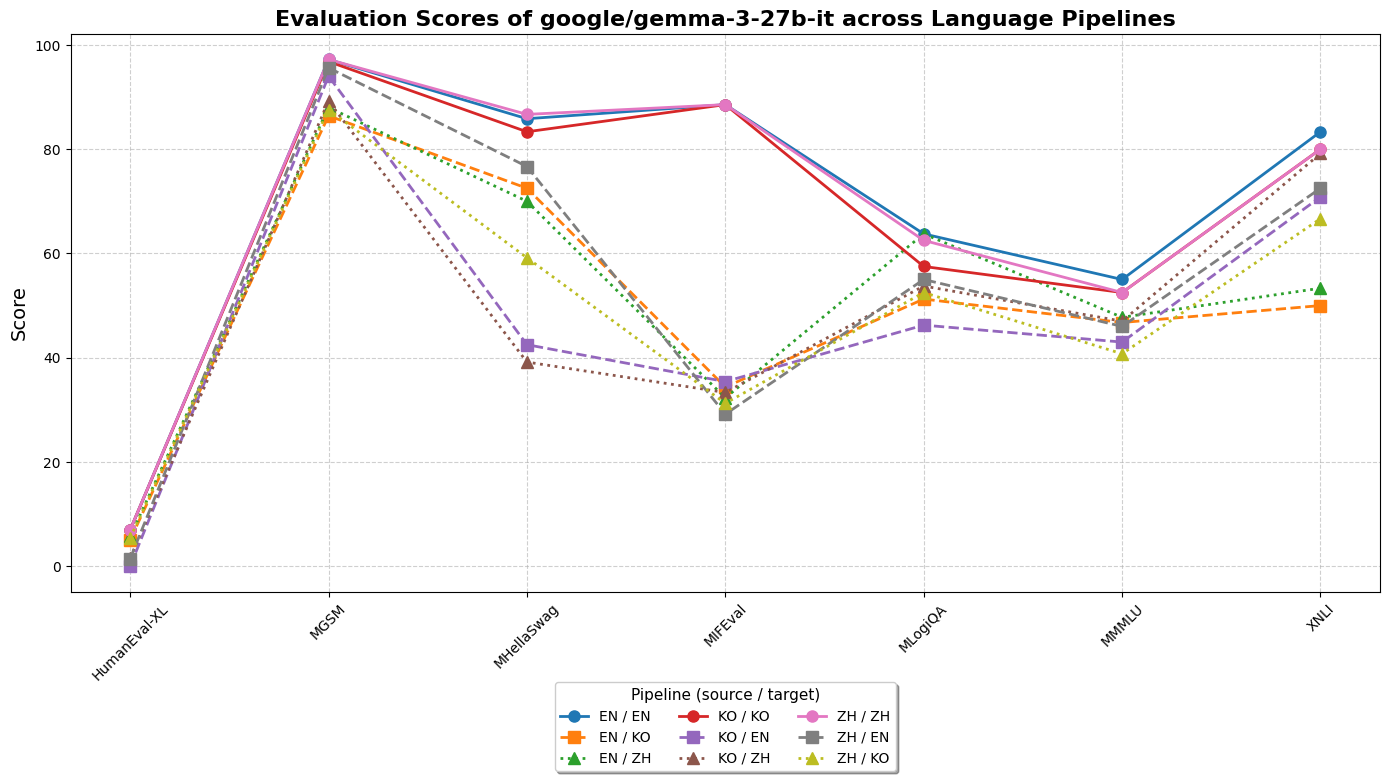

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Data setup
data = {
    "Evaluation": ["HumanEval-XL", "MGSM", "MHellaSwag", "MIFEval", "MLogiQA", "MMMLU", "XNLI"],
    "EN / EN": [6.97, 97.2, 85.8333, 88.54, 63.75, 55, 83.3333],
    "EN / KO": [5.1, 86.4, 72.5, 34.38, 51.25, 46.75, 50],
    "EN / ZH": [5.72, 88, 70, 32.29, 63.75, 47.75, 53.3333],
    
    "KO / KO": [6.97, 96.8, 83.33, 88.54, 57.5, 52.5, 80],
    "KO / EN": [0.02, 94, 42.5, 35.42, 46.25, 43, 70.8333],
    "KO / ZH": [1.56, 89.2, 39.166, 33.33, 53.75, 47, 79.1667],

    "ZH / ZH": [6.979, 97.2, 86.6667, 88.54, 62.5, 52.5, 80],
    "ZH / EN": [1.458, 95.6, 76.6667, 29.17, 55, 46, 72.5],
    "ZH / KO": [5.416, 87.6, 59.1667, 31.25, 52.5, 40.75, 66.6667],
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14, 8))
markers    = ['o', 's', '^', 'o', 's', '^', 'o', 's', '^']
linestyles = ['-', '--', ':', '-', '--', ':', '-', '--', ':']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']

columns_to_plot = [col for col in df.columns if col != 'Evaluation']

for i, col in enumerate(columns_to_plot):
    plt.plot(df['Evaluation'], df[col], label=col, marker=markers[i % len(markers)],
             linestyle=linestyles[i % len(linestyles)], linewidth=2, markersize=8, color=colors[i % len(colors)])

plt.title("Evaluation Scores of google/gemma-3-27b-it across Language Pipelines", fontsize=16, fontweight='bold')
plt.xlabel("Task", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Pipeline (source / target)", fontsize=10, title_fontsize=11, loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=3, frameon=True, shadow=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


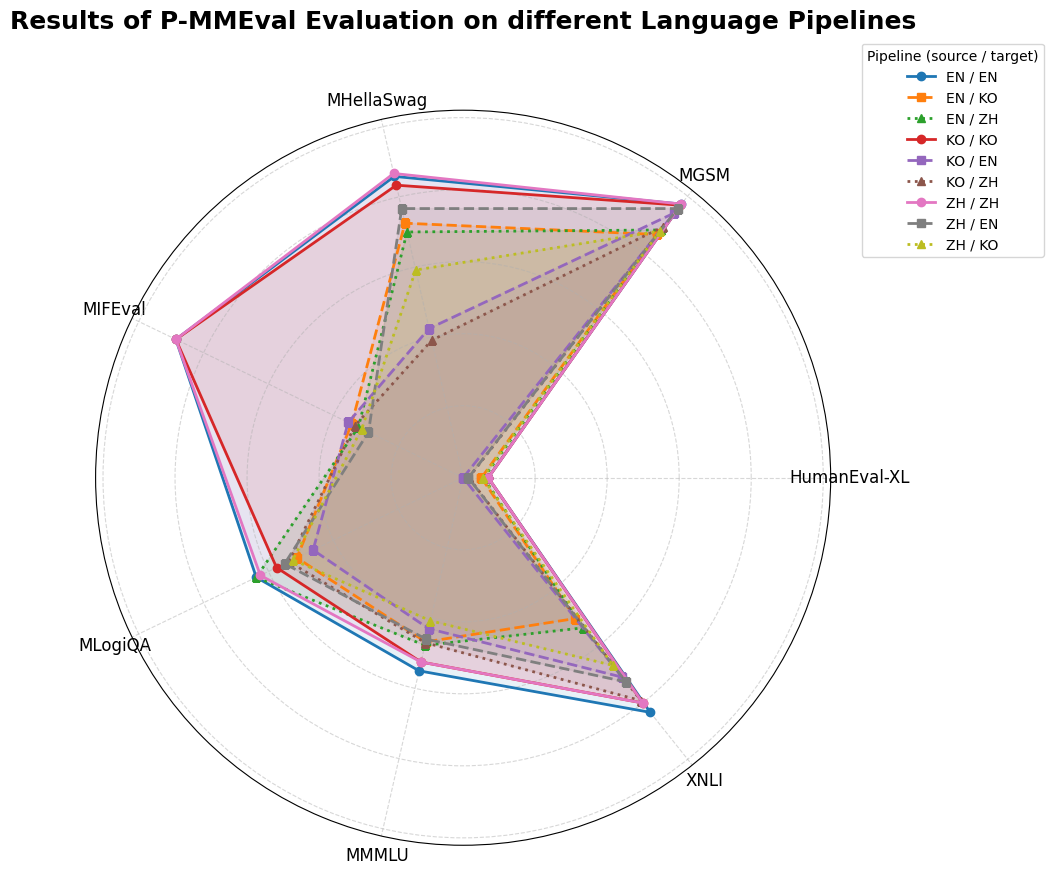

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Radar chart setup
def make_radar_chart(df, categories, labels, title):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    for i, label in enumerate(labels):
        values = df[label].tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=label, linewidth=2, linestyle=linestyles[i % len(linestyles)],
                marker=markers[i % len(markers)], color=colors[i % len(colors)])
        ax.fill(angles, values, alpha=0.1, color=colors[i % len(colors)])

    ax.set_title(title, size=18, weight='bold', y=1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels([])
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10, title="Pipeline (source / target)")

    plt.tight_layout()
    plt.show()

# Plot radar chart
categories = df['Evaluation'].tolist()
labels = [col for col in df.columns if col != 'Evaluation']
make_radar_chart(df, categories, labels, "Results of P-MMEval Evaluation on different Language Pipelines")


In [1]:
# rescoring
import json
import os

english_related_keys = {
    "combination:repeat_prompt",
    "combination:two_responses",
    "detectable_content:number_placeholders",
    "detectable_content:postscript",
    "detectable_format:constrained_response",
    "detectable_format:json_format",
    "detectable_format:number_bullet_lists",
    "detectable_format:number_highlighted_sections",
    "detectable_format:title",
    "keywords:forbidden_words",
    "length_constraints:nth_paragraph_first_word",
    "length_constraints:number_paragraphs",
    "length_constraints:number_sentences",
    "length_constraints:number_words",
    "punctuation:no_comma",
    "startend:end_checker",
    "startend:quotation"
}

def rescoring(folder: str, including_set: set):
    with open(os.path.join(folder, "score.json"), "r") as f:
        ifeval_result = json.load(f)
        
    # Get all tier1 accuracy scores
    tier1_scores = ifeval_result["loose"]["tier1_instruction_accuracy"]

    # Filter out English-related subcategories
    filtered_scores = {
        k: v for k, v in tier1_scores.items() if k in including_set
    }
    
    # Calculate average of filtered scores
    average_filtered_score = sum(filtered_scores.values()) / len(filtered_scores)

    # Display results
    print("Tier1 Scores (excluding English-related subcategories):")
    for k, v in filtered_scores.items():
        print(f"  {k}: {v:.4f}")

    print(f"\n➡️ Average Score (Non-English Tier1): {average_filtered_score*100:.4f}")
    

    


In [2]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/zh",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 0.0244
  combination:two_responses: 0.0833
  detectable_content:number_placeholders: 0.4815
  detectable_content:postscript: 0.3462
  detectable_format:constrained_response: 0.0000
  detectable_format:json_format: 0.3529
  detectable_format:number_bullet_lists: 0.3548
  detectable_format:number_highlighted_sections: 0.6250
  detectable_format:title: 0.1892
  keywords:forbidden_words: 0.7755
  length_constraints:nth_paragraph_first_word: 0.2500
  length_constraints:number_paragraphs: 0.2222
  length_constraints:number_sentences: 0.4808
  length_constraints:number_words: 0.4808
  punctuation:no_comma: 0.1364
  startend:end_checker: 0.0385
  startend:quotation: 0.0976

➡️ Average Score (Non-English Tier1): 29.0535


In [3]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/en",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 0.6341
  combination:two_responses: 1.0000
  detectable_content:number_placeholders: 0.8148
  detectable_content:postscript: 0.9615
  detectable_format:constrained_response: 1.0000
  detectable_format:json_format: 0.7059
  detectable_format:number_bullet_lists: 0.7419
  detectable_format:number_highlighted_sections: 0.8333
  detectable_format:title: 1.0000
  keywords:forbidden_words: 0.8571
  length_constraints:nth_paragraph_first_word: 0.8333
  length_constraints:number_paragraphs: 0.7778
  length_constraints:number_sentences: 0.8462
  length_constraints:number_words: 0.9231
  punctuation:no_comma: 0.9242
  startend:end_checker: 0.8462
  startend:quotation: 0.9268

➡️ Average Score (Non-English Tier1): 86.0365


In [4]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/ko",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 0.0000
  combination:two_responses: 0.0833
  detectable_content:number_placeholders: 0.1852
  detectable_content:postscript: 0.3846
  detectable_format:constrained_response: 0.1000
  detectable_format:json_format: 0.1765
  detectable_format:number_bullet_lists: 0.2258
  detectable_format:number_highlighted_sections: 0.5000
  detectable_format:title: 0.1351
  keywords:forbidden_words: 0.7143
  length_constraints:nth_paragraph_first_word: 0.0833
  length_constraints:number_paragraphs: 0.0741
  length_constraints:number_sentences: 0.4423
  length_constraints:number_words: 0.5385
  punctuation:no_comma: 0.2576
  startend:end_checker: 0.0385
  startend:quotation: 0.0488

➡️ Average Score (Non-English Tier1): 23.4582


In [5]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/zh-tw",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 0.0000
  combination:two_responses: 0.0417
  detectable_content:number_placeholders: 0.4815
  detectable_content:postscript: 0.3077
  detectable_format:constrained_response: 0.1000
  detectable_format:json_format: 0.0588
  detectable_format:number_bullet_lists: 0.2258
  detectable_format:number_highlighted_sections: 0.4583
  detectable_format:title: 0.1622
  keywords:forbidden_words: 0.7959
  length_constraints:nth_paragraph_first_word: 0.0000
  length_constraints:number_paragraphs: 0.2222
  length_constraints:number_sentences: 0.5577
  length_constraints:number_words: 0.5962
  punctuation:no_comma: 0.1212
  startend:end_checker: 0.1154
  startend:quotation: 0.0488

➡️ Average Score (Non-English Tier1): 25.2553


In [6]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/zh",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 0.0244
  combination:two_responses: 0.0833
  detectable_content:number_placeholders: 0.4815
  detectable_content:postscript: 0.3462
  detectable_format:constrained_response: 0.0000
  detectable_format:json_format: 0.3529
  detectable_format:number_bullet_lists: 0.3548
  detectable_format:number_highlighted_sections: 0.6250
  detectable_format:title: 0.1892
  keywords:forbidden_words: 0.7755
  length_constraints:nth_paragraph_first_word: 0.2500
  length_constraints:number_paragraphs: 0.2222
  length_constraints:number_sentences: 0.4808
  length_constraints:number_words: 0.4808
  punctuation:no_comma: 0.1364
  startend:end_checker: 0.0385
  startend:quotation: 0.0976

➡️ Average Score (Non-English Tier1): 29.0535
